# IMF figure from https://github.com/keflavich/imf/blob/master/examples/imf_figure.py

Total cluster mass is 999.96 (limit was 1000)
Total cluster mass is 1007.78 (limit was 1000)
Total cluster mass is 1123.7 (limit was 1000)
Total cluster mass is 999.802 (limit was 1000)
Total cluster mass is 1001.41 (limit was 1000)
Total cluster mass is 1001.39 (limit was 1000)
Total cluster mass is 995.438 (limit was 1000)
Total cluster mass is 1015.7 (limit was 1000)
Total cluster mass is 1000.26 (limit was 1000)
Total cluster mass is 998.787 (limit was 1000)
Total cluster mass is 999.775 (limit was 1000)


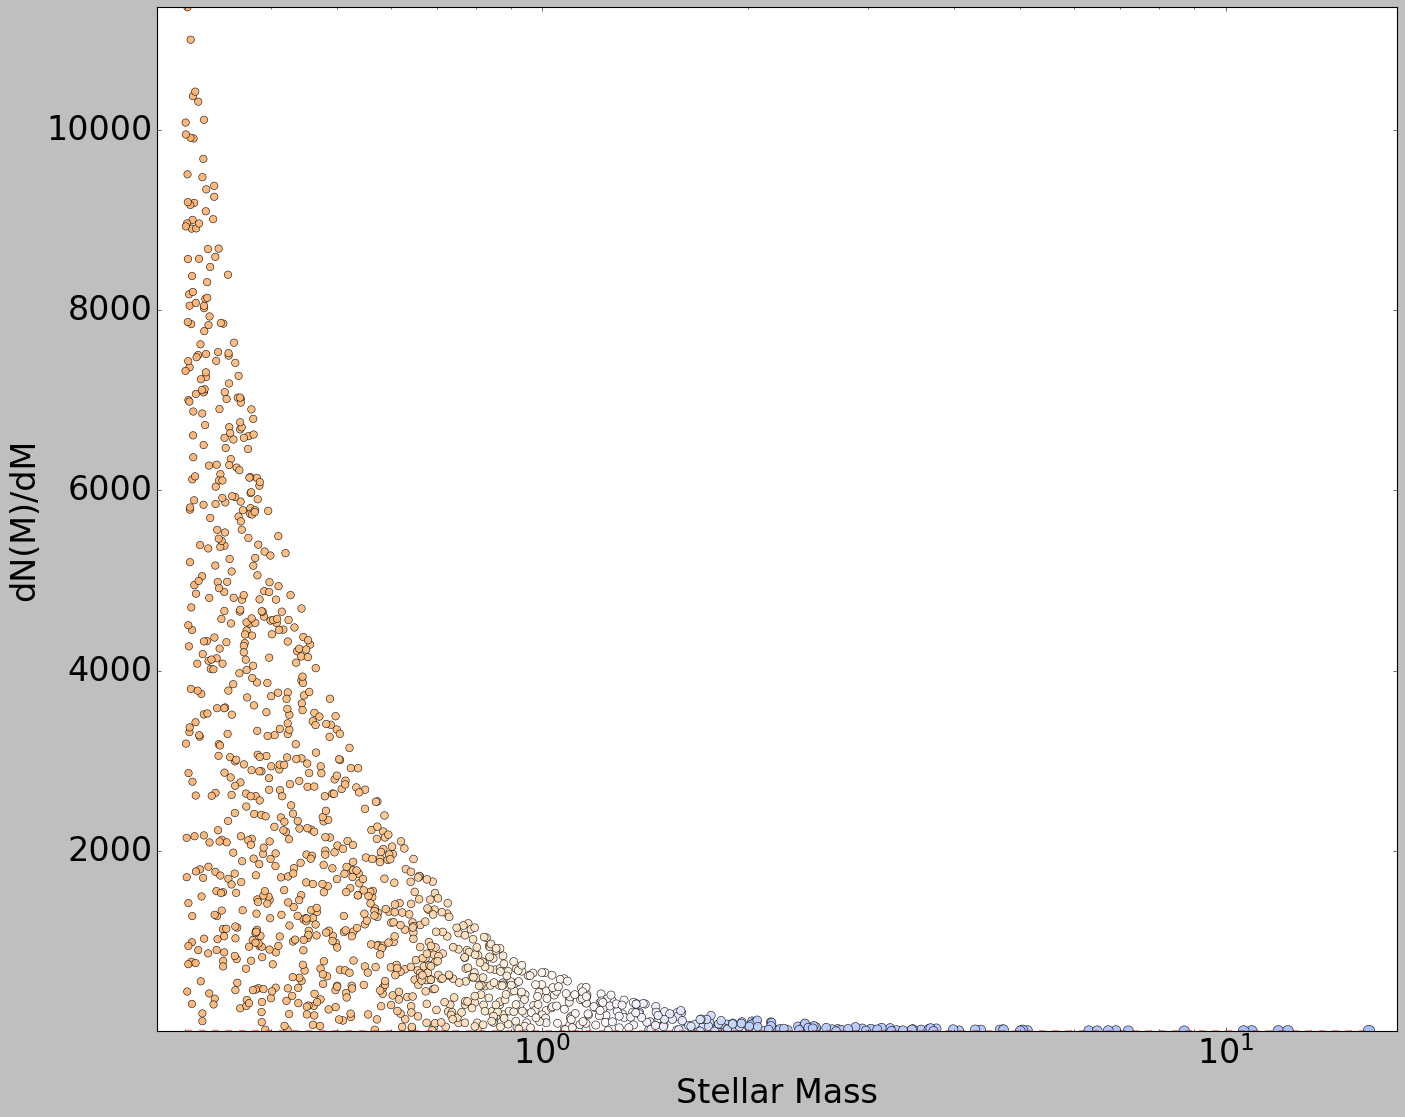

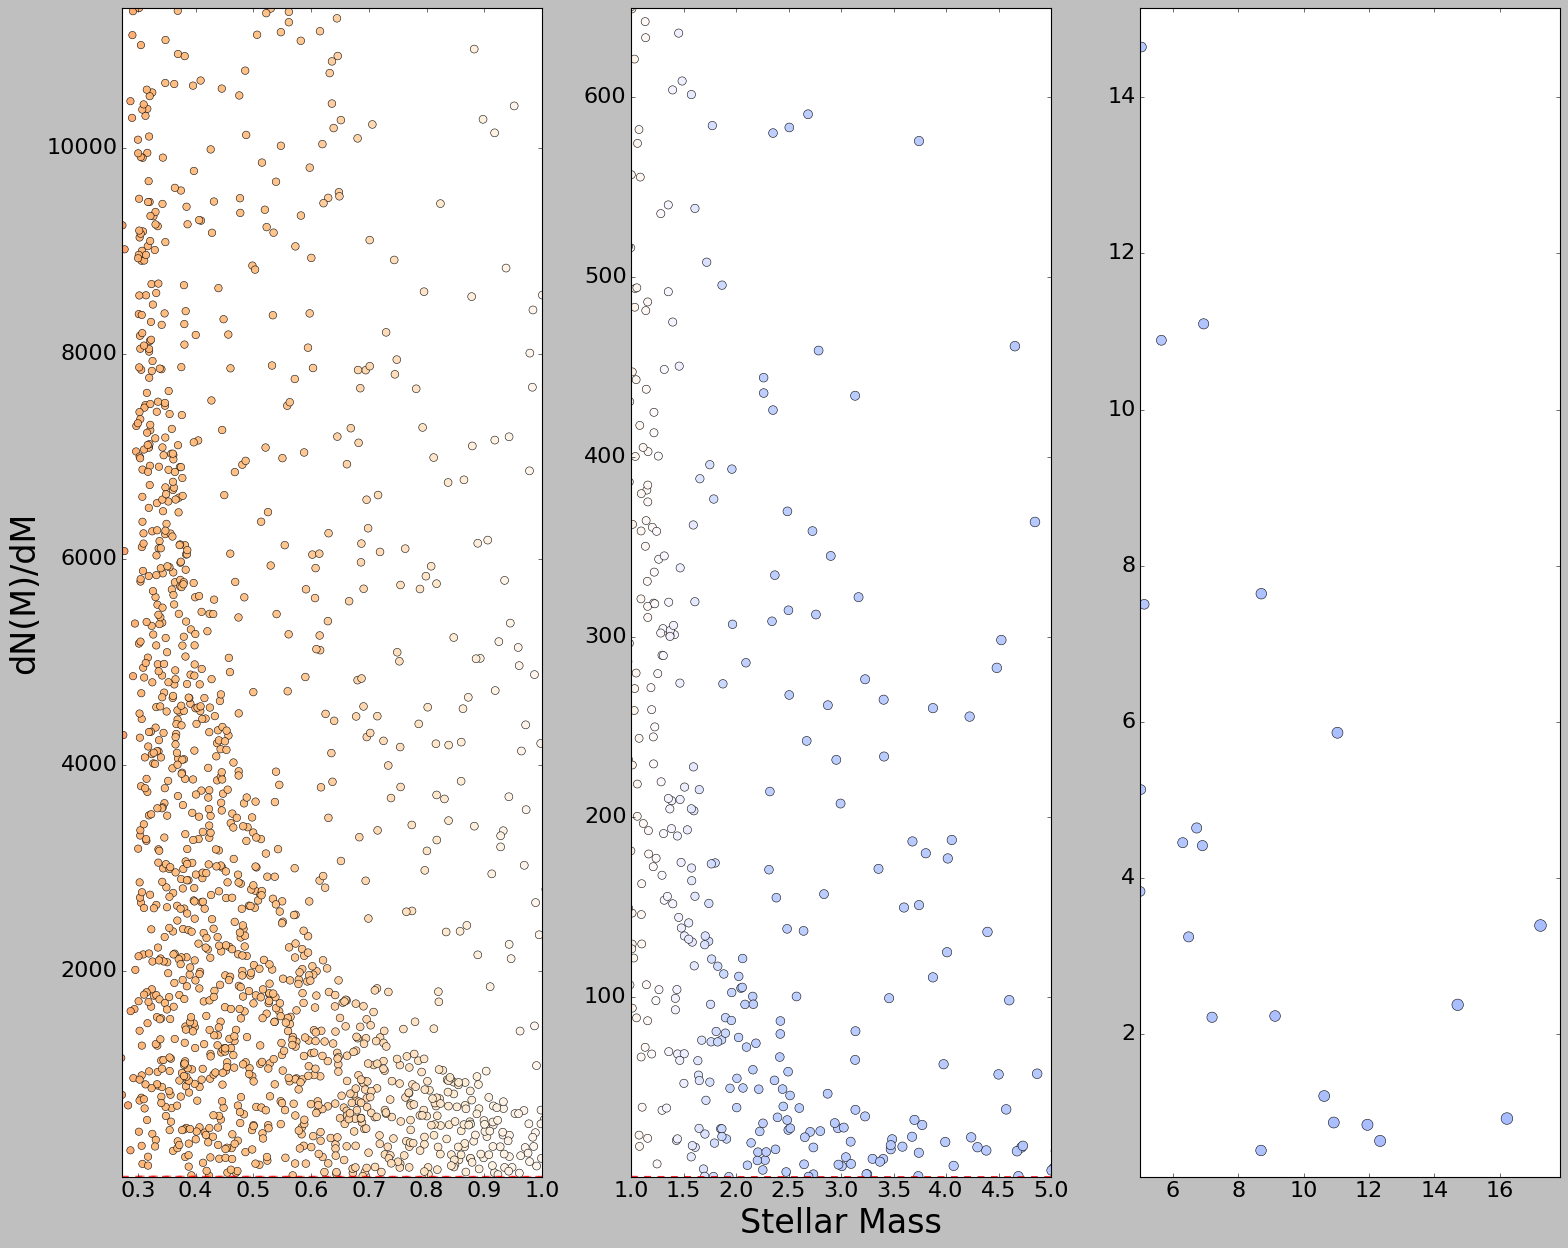

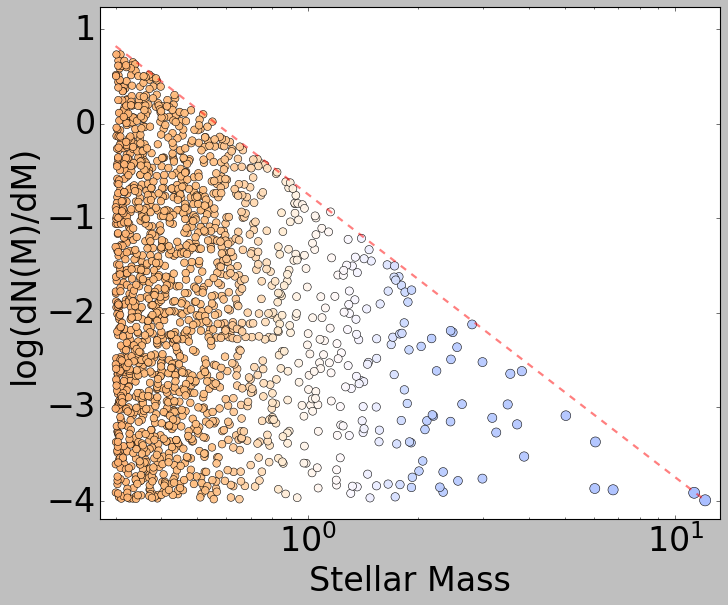

In [1]:
%run ../imf/examples/imf_figure.py

What fraction of the luminosity comes from each group?

Is this correct?

$$p(L) = p(M) L(M) $$

$$p(L) dM = p(M) L(M) dM$$

In [2]:
imf.Kroupa.mmin

In [3]:
from scipy.integrate import quad
import warnings

def lumfunc(mass, massfunc=imf.Kroupa(), mtol=imf.lum_of_star):
    return massfunc(mass) * 10**mtol(mass)

def lumfunc_permass(mass, massfunc=imf.Kroupa(), mtol=imf.lum_of_star):
    return massfunc(mass) * 10**mtol(mass) / mass

def lumfunc_int(mmin, mmax, massfunc=imf.Kroupa(), mtol=imf.lum_of_star):
    with warnings.catch_warnings() as w:
        warnings.simplefilter('ignore')
        norm, nerr = quad(lumfunc, massfunc.mmin, massfunc.mmax, limit=1000)
        integ, err = quad(lumfunc, mmin, mmax, limit=1000)
        if nerr/norm > 1e-3 or err/integ > 1e-3:
            print(f'w={w}, nerr={nerr}, norm={norm}, err={err}, integ={integ}')
    
    return integ/norm

def lumfunc_mass_int(mmin, mmax, massfunc=imf.Kroupa(), mtol=imf.lum_of_star):
    with warnings.catch_warnings() as w:
        warnings.simplefilter('ignore')
        norm, nerr = quad(lumfunc_permass, massfunc.mmin, massfunc.mmax, limit=1000)
        integ, err = quad(lumfunc_permass, mmin, mmax, limit=1000)
        if nerr/norm > 1e-3 or err/integ > 1e-3:
            print(f'w={w}, nerr={nerr}, norm={norm}, err={err}, integ={integ}')
    
    return integ/norm

In [4]:
lumfunc_int(0.03, 8)

0.008872211569375996

# Stars from 8-20 Msun

5% of the luminosity

0.3% of the number

9% of the mass

71% of the supernovae

In [5]:
# luminosity fraction
lumfunc_int(8, 20)

0.05264558277674181

In [6]:
# number fraction
imf.kroupa.integrate(8, 20)

(0.0032802414663399837, 0)

In [7]:
# mass fraction
imf.kroupa.m_integrate(8, 20)[0] / imf.kroupa.m_integrate(0.03, 120)[0]

0.09047618140151982

In [8]:
# supernova fraction
imf.kroupa.integrate(8, 20)[0] / imf.kroupa.integrate(8, 120)[0]

0.7173604707588744

# Stars from 0.03-8 Msun

<1% of the luminosity

99.5% of the number

79% of the mass

0% of the supernovae

In [9]:
# luminosity fraction
lumfunc_int(0.03, 8)

0.008872211569375996

In [10]:
# number fraction
imf.kroupa.integrate(0.03, 8)

(0.9954273456650463, 0)

In [11]:
# mass fraction
imf.kroupa.m_integrate(0.03, 8)[0] / imf.kroupa.m_integrate(0.03, 120)[0]

0.7906143513377926

In [12]:
# supernova fraction
0 #imf.kroupa.integrate(20, 120)[0] / imf.kroupa.integrate(8, 120)[0]

0

# Stars from 20-120 Msun

94% of the luminosity

1% of the number

12% of the mass

28% of the supernovae

In [13]:
# luminosity fraction
lumfunc_int(20, 120)

0.9384826713164334

In [14]:
# number fraction
imf.kroupa.integrate(20, 120)

(0.0012924128686137015, 0)

In [15]:
# mass fraction
imf.kroupa.m_integrate(20, 120)[0] / imf.kroupa.m_integrate(0.03, 120)[0]

0.11890946726068764

In [16]:
# supernova fraction
imf.kroupa.integrate(20, 120)[0] / imf.kroupa.integrate(8, 120)[0]

0.2826395292411255

# Plot

Total cluster mass is 9991.6 (limit was 10000)


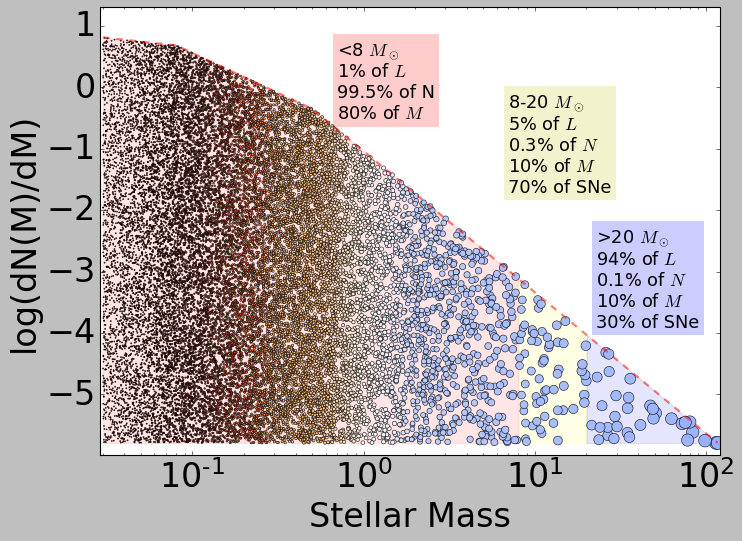

In [59]:
massfunc = imf.kroupa
name = 'Kroupa'
pl.figure(1, figsize=(10,7))
pl.clf()
cluster,yax,colors = coolplot(10000, massfunc=massfunc)
cluster = np.array(cluster)
yax = np.array(yax)
pl.scatter(cluster, yax, c=colors, s=np.log10(cluster+3)*85 - 40,
           linewidths=0.5, edgecolors=(0,0,0,0.25), alpha=0.95)
pl.gca().set_xscale('log')

masses = np.logspace(np.log10(cluster.min()), np.log10(cluster.max()),10000)

pl.plot(masses,np.log10(massfunc(masses)),'r--',linewidth=2,alpha=0.5)

masses = np.geomspace(0.03, 8)
pl.fill_between(masses, min(yax), np.log10(massfunc(masses)), alpha=0.1, color='red', label='<8 M$_\odot$\n1% of $L$\n99.5% of N\n79% of M', zorder=-5)
masses = np.geomspace(8, 20)
pl.fill_between(masses, min(yax), np.log10(massfunc(masses)), alpha=0.1, color='yellow', label='8-20 M$_\odot$\n5% of $L$\n0.3% of N\n9% of M\n72% of SNe', zorder=-5)
masses = np.geomspace(20, max(cluster))
pl.fill_between(masses, min(yax), np.log10(massfunc(masses)), alpha=0.1, label='20-120 M$_\odot$\n94% of $L$\n0.1% of N\n12% of M\n28% of SNe', zorder=-5)

pl.text(0.7, -0.5, '<8 $M_\odot$\n1% of $L$\n99.5% of N\n80% of $M$', fontsize=16, bbox={'facecolor': 'r', 'alpha': 0.2, 'edgecolor': 'none'})
pl.text(7, -1.7, '8-20 $M_\odot$\n5% of $L$\n0.3% of $N$\n10% of $M$\n70% of SNe', fontsize=16, bbox={'facecolor': 'y', 'alpha': 0.2, 'edgecolor': 'none'})
pl.text(22.8, -3.9, '>20 $M_\odot$\n94% of $L$\n0.1% of $N$\n10% of $M$\n30% of SNe', fontsize=16, bbox={'facecolor': 'b', 'alpha': 0.2, 'edgecolor': 'none'})

pl.xlabel("Stellar Mass")
pl.ylabel("log(dN(M)/dM)")
#pl.legend(loc='upper right', fontsize=12)
pl.gca().axis([min(cluster)/1.1,max(cluster)*1.1,min(yax)-0.2,max(yax)+0.5])
pl.xlim(0.029, 121)
pl.savefig("{0}_imf_figure_log_labeledfractions.png".format(name),bbox_inches='tight', dpi=150)
pl.savefig("{0}_imf_figure_log_labeledfractions.pdf".format(name),bbox_inches='tight')
pl.savefig("{0}_imf_figure_log_labeledfractions.svg".format(name),bbox_inches='tight')

In [ ]:
# mass fraction
imf.kroupa.m_integrate(0.01, 150)

# Where do 50% of the SNe come from?

In [ ]:
# supernova fraction
imf.kroupa.integrate(8, 14)[0] / imf.kroupa.integrate(8, 120)[0]

# p(L)

In [ ]:
masses = np.geomspace(0.03, 100)
pl.loglog(masses, lumfunc(masses))
pl.ylabel("P(L) [not normalized]")
pl.xlabel("M");